In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess import get_feature_datasets

MODEL_PATH = "./models/model.pkls"
TRAIN_CSV_PATH = "./train_features.csv" 
TEST_CSV_PATH = "./test_features.csv"

In [2]:
print("Loading datasets for final testing...")
X_train_full, y_train_full, X_test_full, y_test, label_encoder = get_feature_datasets(TRAIN_CSV_PATH, TEST_CSV_PATH)

model = joblib.load(MODEL_PATH)
print(f"Model loaded. Expected feature count: {model.n_features_in_}")
print(f"Actual test feature count: {X_test_full.shape[1]}")

Loading datasets for final testing...
Engineering features from landmarks...
New feature shape: (18629, 2487)
Model loaded. Expected feature count: 2487
Actual test feature count: 2487


In [4]:
if model.n_features_in_ != X_test_full.shape[1]:
    raise ValueError(
        f"CRITICAL ERROR: Feature mismatch! The model was trained with {model.n_features_in_} features, "
        f"but the test data has {X_test_full.shape[1]} features. "
    )

X_test = X_test_full
print("Feature dimensions match. Proceed with predictions")

Feature dimensions match. Proceed with predictions


In [5]:
y_pred = model.predict(X_test)
print("Predictions completed.")

Predictions completed.


In [6]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n=== FINAL TEST ACCURACY: {acc * 100:.2f}% ===")
print(f"=== FINAL TEST MACRO F1-SCORE: {f1:.4f} ===\n")

print("Final Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


=== FINAL TEST ACCURACY: 56.41% ===
=== FINAL TEST MACRO F1-SCORE: 0.5187 ===

Final Classification Report:
              precision    recall  f1-score   support

       angry       0.48      0.40      0.44       523
     disgust       0.86      0.31      0.46        58
        fear       0.51      0.25      0.33       570
       happy       0.76      0.84      0.80      1037
     neutral       0.43      0.58      0.49       717
         sad       0.43      0.45      0.44       653
    surprise       0.67      0.68      0.68       459

    accuracy                           0.56      4017
   macro avg       0.59      0.50      0.52      4017
weighted avg       0.57      0.56      0.55      4017



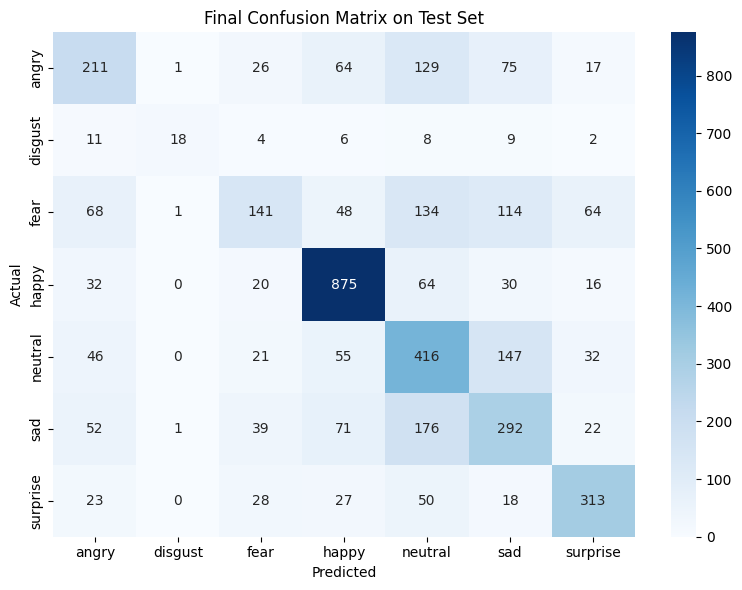

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix on Test Set')
plt.tight_layout()
plt.show()